In [2]:
import torch

m = 100
M = torch.rand(m, m)
eigvals, eigvecs = torch.linalg.eigh(M)

a0, b0 = torch.rand(1), torch.rand(m)
a0.requires_grad = True
b0.requires_grad = True

optimizer = torch.optim.SGD([a0, b0], lr=1.0)


/home/lucmon/lucmon/anaconda3/envs/mlopt/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
def func(a, b, M):
    return 0.5*torch.norm(a**2 * torch.outer(b, b) - M)

In [5]:
epoch = 10000
loss_list = []
b0 = eigvecs[:,50]
a, b = torch.tensor(a0, requires_grad=True), torch.tensor(b0+torch.rand(m)*0.1, requires_grad=True)
optimizer = torch.optim.SGD([{"params":a}, {'params': b}], lr=0.001)
for i in range(epoch):
    loss = func(a, b, M)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_list.append(loss.item())

/tmp/ipykernel_41748/1194828184.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  a, b = torch.tensor(a0, requires_grad=True), torch.tensor(b0+torch.rand(m)*0.1, requires_grad=True)


In [ ]:
epoch = 10000
loss_list = []
b0 = eigvecs[:,50]
a, b = torch.tensor(a0, requires_grad=True), torch.tensor(b0+torch.rand(m)*0.1, requires_grad=True)
optimizer = torch.optim.SGD([{"params":a}, {'params': b}], lr=0.001)
for i in range(epoch):
    loss = func(a, b, M)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_list.append(loss.item())

In [7]:
epoch = 10000
loss_list2 = {}
b0 = eigvecs[:,50]
scales = [0.5, 1, 2,4]
for scale in scales:
    a, b = torch.tensor(a0, requires_grad=True), torch.tensor(b0+torch.rand(m)*0.1, requires_grad=True)
    loss_list2[scale] = []
    for i in range(epoch):
        optimizer = torch.optim.SGD([{"params":a}, {'params': b}], lr=0.001)
        loss = func(a, b, M)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        norm = torch.norm(a*b)
        a = torch.tensor(torch.sqrt(norm) *scale, requires_grad=True)
        b = torch.tensor(torch.sqrt(norm) * b  /scale/ torch.norm(b), requires_grad=True)
        loss_list2[scale].append(loss.item())

/tmp/ipykernel_4477/1421937642.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  a, b = torch.tensor(a0, requires_grad=True), torch.tensor(b0+torch.rand(m)*0.1, requires_grad=True)
/tmp/ipykernel_4477/1421937642.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  a = torch.tensor(torch.sqrt(norm) *scale, requires_grad=True)
/tmp/ipykernel_4477/1421937642.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  b = torch.tensor(torch.sqrt(norm) * b  /scale/ torch.norm(b), requires_grad=True)


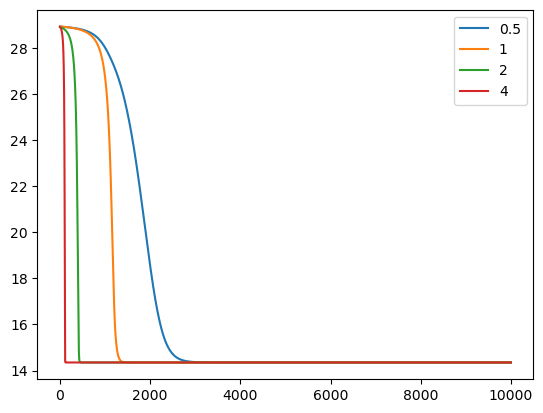

In [8]:
import matplotlib.pyplot as plt
#plt.plot(loss_list)
for scale in scales:
    plt.plot(loss_list2[scale])
plt.legend(scales)

In [25]:
def cosine(a, b):
    return a@b/torch.norm(a)/torch.norm(b)

In [63]:
cosine(eigvecs[:,-1], b)

tensor(0.9993, grad_fn=<DivBackward0>)